**1. 다음 코드를 실행했을 때 출력될 값 4개를 순서대로 쓰시오.**

벡터 $[0,1,2,3,4,5,6,7,8]$를 먼저 만들고 $3 \times 3$행렬로 reshape을 합니다.

In [1]:
import numpy as np

x=np.arange(9).reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


$3 \times 3$ 행렬에 숫자 1을 더하라고 하면 numpy는 모든 항에 1을 더하라는 뜻으로 받아들입니다.

In [2]:
x+=1
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


$3 \times 3$ 행렬에 행벡터 $[1,2,3]$을 더하라고 하면 numpy는 각 행에 행벡터 $[1,2,3]$을 더하라는 뜻으로 받아들입니다.

In [3]:
x+=np.array([1,2,3])
print(x)

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


$3 \times 3$ 행렬에 열벡터 $\begin{bmatrix}1\\2\\3\end{bmatrix}$을 더하라고 하면 numpy는 각 열에 열벡터 $\begin{bmatrix}1\\2\\3\end{bmatrix}$을 더하라는 뜻으로 받아들입니다.

In [4]:
x+=np.array([[1,2,3]]).T
print(x)

[[ 3  5  7]
 [ 7  9 11]
 [11 13 15]]


**2. (i)  mnist$\_$show.py를 수정하여 첫번째  이미지를 음영이 뒤바뀐 두번째 이미지가 출력되도록 하시오.**

**(ii) 첫번째  이미지를 대각선 기준으로 뒤집은 세번째 이미지가 출력되도록 수정하시오.**

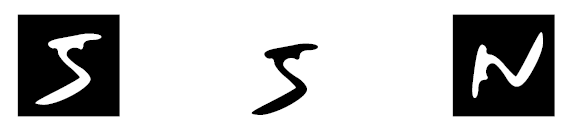

In [5]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.

컴퓨터가 왼쪽 이미지를 이해하는 방식은 행렬입니다.

In [6]:
import numpy as np
from dataset.mnist import load_mnist

np.set_printoptions(linewidth=200,threshold=1000)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

print(x_train[0][0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

행렬의 항들은 픽셀의 밝기를 나타냅니다.  
$255 - [x_{i,j}]$은 스칼라 빼기 행렬이라서 수학에서는 잘못된 표현이지만 파이썬은 $[255 - x_{i,j}]$로 이해합니다.  
어두운 픽셀은 밝아지고 밝은 픽셀은 어두워집니다.

In [7]:
print(255 - x_train[0][0])

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 252 237 237 237 129 119  80 229  89   0   8 128 255 255 255 255]
 [255 255 255 255 255 255 255 255 225 219 161 101  85   2   2   2   2   2  30  83   2  13  60 191 255 255 255 255]
 [255 255 255 255 255 255 255 206  17   2   2   2   2   2   2   2   2   4 162 173 173 199 216 255 255 255 255 255]
 [255 255 255 255 255 255 255 237  36   2   2   2   2   2  57  73   8  14 255 25

이미지를 대각선으로 뒤집는 변환은 선형대수학 관점에서는 transpose입니다.

In [8]:
print(x_train[0][0].T)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 136   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 172 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 226 253   0   0   0]
 [  0   0   0   0   0   0   0  49  18   0   0   0   0   0   0   0   0   0   0   0   0   0 171 253 253   0   0   0]
 [  0   0   0   0   0   0  30 238 219  80   0   0   0   0   0   0   0   0   0   

따라서, 마지막 줄 코드 img_show(img)를 간단히 img_show(255 - img)와 img_show(img.T)로 수정해주면 두번째와 세번째 이미지를 각각 얻을수 있습니다.

주피터 노트북에서 이미지를 출력하기 위해서 PIL 라이브러리 대신 plt.imshow를 사용하겠습니다.

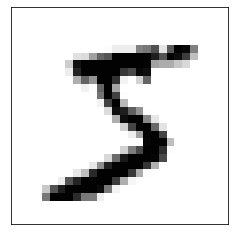

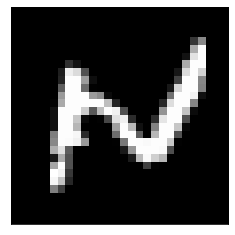

In [9]:
import matplotlib.pyplot as plt

plt.imshow(255 - x_train[0][0], cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(x_train[0][0].T, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

**3. 적절한 $5 \times 5$ 행렬에 {\tt plt.imshow}를 적용하여 다음 여섯 이미지를 출력하시오. (cmap=plt.cm.gray)**
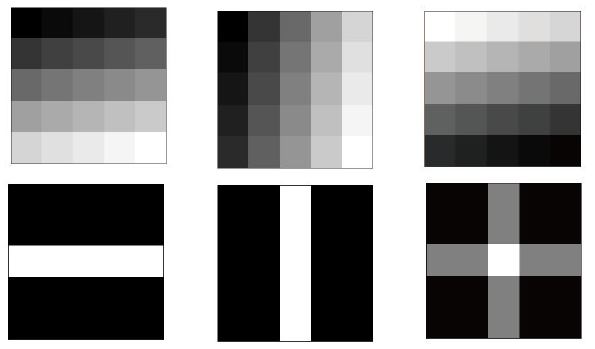

작은 사각형 하나 하나가 픽셀입니다. $5 \times 5$ 해상도 이미지네요.
밝기의 패턴을 보고 $5 \times 5$ 행렬을 만듭니다.

In [10]:
x=np.arange(25).reshape(5,5)
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


plt.imshow를 이용해 행렬을 이미지로 변환합니다.

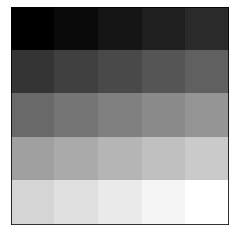

In [11]:
plt.imshow(x,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

transpose를 합니다.

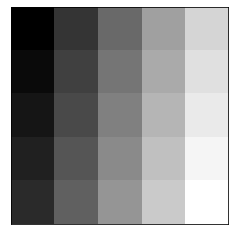

In [12]:
plt.imshow(x.T,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

밝은 픽셀은 어둡게 어두운 픽셀은 밝게 뒤집습니다.
최대 밝기가 24이므로 24에서 빼주면 대소관계가 뒤집힙니다.
행렬로 쓸필요 없이 숫자 24에서 빼면 파이썬이 브로드케스팅으로 처리합니다.

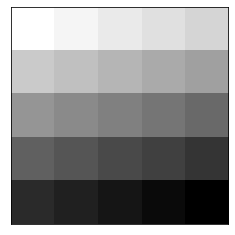

In [13]:
plt.imshow(24-x,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

중앙행만 1이고 나머지는 0인 행렬을 만듭니다.
파이썬은 0부터 출발하기 때문에 2행이 중앙행입니다.

In [14]:
x1=np.zeros((5,5))
x1[2,:]=1
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


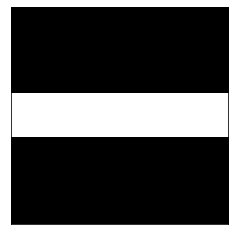

In [15]:
plt.imshow(x1,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

중앙열만 1이고 나머지는 0인 행렬을 만듭니다. 파이썬은 0부터 출발하기 때문에 2열이 중앙열입니다.

In [16]:
x2=np.zeros((5,5))
x2[:,2]=1
print(x2)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


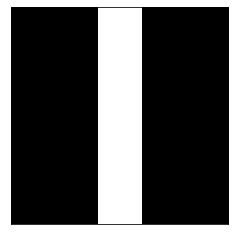

In [17]:
plt.imshow(x2,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

두 행렬을 더합니다.

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 2. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


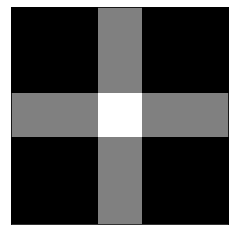

In [18]:
print(x1+x2)

plt.imshow(x1+x2,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

**4. (i) MNIST imshow.py를 수정하여 훈련용 MNIST데이터중 라벨이 2인 데이터 첫 25개를 다음과 같이 출력하시오.**
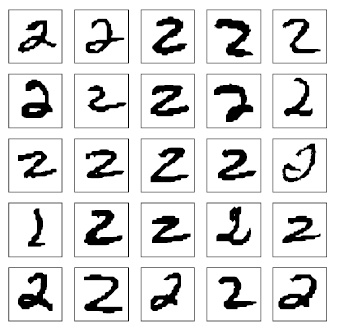

라벨이 2인 인덱스를 모은 리스트를 먼저 만듭니다.

In [19]:
N=2
N_index=[]

for k in range(len(x_train)):
    if t_train[k]==N:
        N_index.append(k)

print(N_index)

[5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 143, 159, 161, 171, 178, 180, 187, 189, 190, 199, 213, 220, 233, 252, 253, 262, 268, 277, 308, 317, 318, 325, 339, 347, 360, 365, 375, 378, 381, 385, 390, 391, 400, 410, 432, 444, 448, 457, 472, 476, 477, 493, 515, 530, 548, 551, 555, 558, 563, 568, 570, 584, 588, 591, 619, 642, 646, 650, 657, 664, 673, 674, 684, 688, 693, 696, 713, 714, 716, 732, 774, 801, 807, 813, 814, 830, 844, 854, 862, 863, 866, 873, 893, 907, 917, 931, 938, 946, 989, 1010, 1011, 1033, 1034, 1047, 1048, 1053, 1058, 1074, 1096, 1124, 1129, 1134, 1140, 1143, 1165, 1175, 1183, 1188, 1199, 1213, 1246, 1249, 1255, 1262, 1264, 1270, 1299, 1301, 1330, 1334, 1361, 1374, 1385, 1390, 1391, 1395, 1397, 1407, 1427, 1438, 1444, 1447, 1478, 1492, 1510, 1531, 1539, 1549, 1550, 1558, 1561, 1563, 1572, 1573, 1584, 1595, 1602, 1609, 1614, 1624, 1629, 1648, 1649, 1660, 1662, 1679, 1711, 1714, 1715, 1724, 1727, 1735, 1753, 1754, 1755, 1766, 1774, 1800, 1823, 1841, 1852, 1861, 1874, 1880, 1

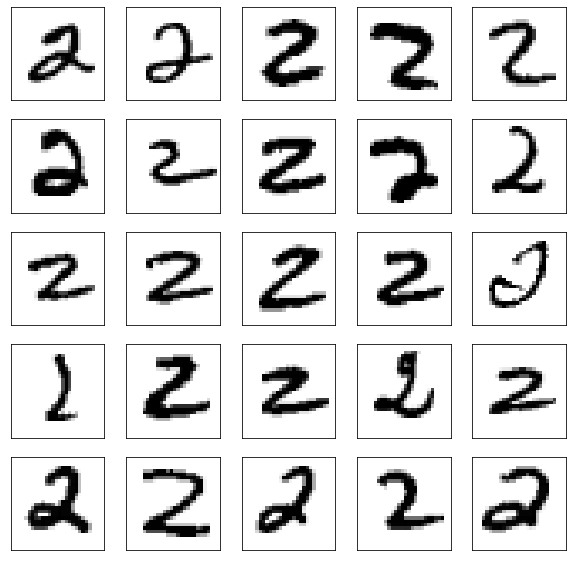

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[N_index[i]][0], cmap=plt.cm.binary)

plt.show()

**(ii) MNIST imshow.py를 수정하여 훈련용 MNIST데이터중 랜덤하게 25개를 뽑아서 5$\times$5 모아찍기로 출력하시오.**

`np.random.choice`를 이용해 인덱스 $0,1,2,\cdots, 59999$w중에서 25개의 숫자를 랜덤하게 뽑습니다.  
랜덤하게 뽑으므로 실행할때마다 뽑히는 인덱스는 달라집니다.

In [21]:
random_index = np.random.choice(len(x_train), 25)
print(random_index)

[39263 52901 19449  8748 35456 45016 17460 27698 50919 39767 41782 50148 55869 13198 41866 18695 12702 53731 24032 16627 27870  4844 33624 48857 17985]


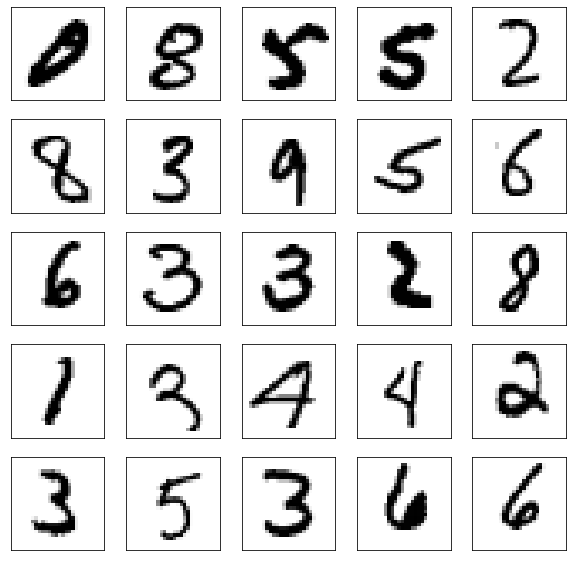

In [22]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[random_index[i]][0], cmap=plt.cm.binary)

plt.show()